In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

C:\Users\Admin\AppData\Local\Temp\ipykernel_14724\892744354.py:28: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=50.
  ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),


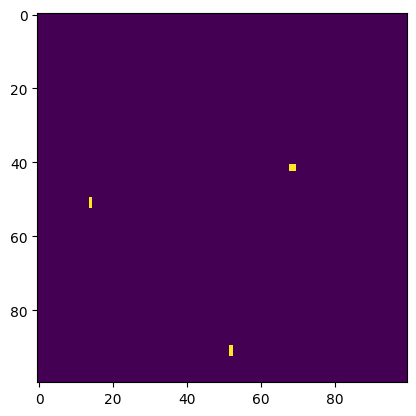

In [2]:
 

t=50
N = 100
grid = np.random.choice([0, 1], size=(N, N), p=[0.18, 0.82])

def compute_neighbours(grid):
    """Compute the number of live neighbors for each cell."""
    neighbors = sum(np.roll(np.roll(grid, i, 0), j, 1)
                    for i in (-1, 0, 1) for j in (-1, 0, 1)
                    if (i != 0 or j != 0))
    return neighbors

def update(frameNum, img, grid, N):
    """Update the grid for the next generation."""
    new_grid = grid.copy()
    neighbors = compute_neighbours(grid)
    
    # Apply Conway's rules
    new_grid[(grid == 1) & (neighbors < 2)] = 0
    new_grid[(grid == 1) & (neighbors > 3)] = 0
    new_grid[(grid == 0) & (neighbors == 3)] = 1
    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img,

# Set up the plot
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                              frames=t,
                              interval=1000,
                              save_count=t)

from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=15)

# Save the animation
ani.save('game_of_life.gif', writer=writer)

##### P & t evolution of states 

In [17]:
# Looking at evolution of states over p and t


t=50
N = 100
grid = np.random.choice([0, 1], size=(N, N), p=[0.18, 0.82])

def calculate_states(grid, return_grid=False):
    """
    Calculate the number of ('D', 0), ('D', 1), ('S', 0), ('S', 1), ('G', 0), ('G', 1) states.
    This function will consider the rules given in the image uploaded.
    """
    neighbors = compute_neighbours(grid)
    N = grid.shape[0]
    
    # Initialize counters for each state
    states_count = {('D', 0): 0, ('D', 1): 0,
                    ('S', 0): 0, ('S', 1): 0,
                    ('G', 0): 0, ('G', 1): 0}

    # Define the rules based on the number of neighbors
    decay_neighbors = set([0, 1, 4, 5, 6, 7, 8])
    stable_neighbors = {2}
    growth_neighbors = {3}

    if return_grid:
        # Create a grid to store the states
        state_grid = np.full(grid.shape, 'X')  # 'X' for unclassified cells

        for i in range(N):
            for j in range(N):
                n = neighbors[i, j]
                if n in decay_neighbors:
                    state_grid[i, j] = 'D'
                elif n in stable_neighbors:
                    state_grid[i, j] = 'S'
                elif n in growth_neighbors:
                    state_grid[i, j] = 'G'

        return state_grid

    return states_count



def run_simulations(p_values, t_vals, N):
    # Store the results
    results = []
    (end,interval)=t_vals
    for p in p_values:
        # Initialize the grid for each simulation
        grid = np.random.choice([0, 1], size=(N, N), p=[1-p, p])
        for t in range(int(end)):
            # Run the simulation
            grid = update_grid(grid)
            # Calculate and store the states
            if t%interval == 0:
                states_count = calculate_states(grid)
                results.append({'p': p, 't': t, 'states_count': states_count})

    return results

def update_grid(grid):
    new_grid = grid.copy()
    neighbors = compute_neighbours(grid)
    # Apply rules (from your existing update function)
    new_grid[(grid == 1) & (neighbors < 2)] = 0
    new_grid[(grid == 1) & (neighbors > 3)] = 0
    new_grid[(grid == 0) & (neighbors == 3)] = 1
    return new_grid

# Define your p and t values
p_values = np.linspace(0, 1, num=20)  # Adjust the number of points as needed
end_t,interval_t=10000,100
t_values=(end_t,interval_t)
N = 100  # Grid size

# Run the simulations
simulation_results = run_simulations(p_values, t_values, N)    

In [15]:
import os
import plotly.graph_objects as go
import plotly.io as pio

# Folder name
folder_name = "3D_p_t_state_plots"

# Create the folder if it does not exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Assuming simulation_results is a list of dictionaries as described earlier
states = [('D', 0), ('D', 1), ('S', 0), ('S', 1), ('G', 0), ('G', 1)]

for state in states:
    # Extract data for the current state
    x = [result['p'] for result in simulation_results]
    y = [result['t'] for result in simulation_results]
    z = [result['states_count'][state] for result in simulation_results]

    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                       marker=dict(size=5, opacity=0.8))])

    # Update layout
    fig.update_layout(title=f"State {state} over p and t",
                      scene=dict(
                          xaxis_title='p',
                          yaxis_title='t',
                          zaxis_title='State Count'
                      ),
                      margin=dict(l=0, r=0, b=0, t=0))

    # Define the file path
    filename = f"{folder_name}/state_{state[0]}_{state[1]}.html"
    pio.write_html(fig, file=filename)

    print(f"Saved: {filename}")

Saved: 3D_p_t_state_plots/state_D_0.html
Saved: 3D_p_t_state_plots/state_D_1.html
Saved: 3D_p_t_state_plots/state_S_0.html
Saved: 3D_p_t_state_plots/state_S_1.html
Saved: 3D_p_t_state_plots/state_G_0.html
Saved: 3D_p_t_state_plots/state_G_1.html


In [16]:
# Assuming simulation_results is a list of dictionaries as described earlier
states = [('D', 0), ('D', 1), ('S', 0), ('S', 1), ('G', 0), ('G', 1)]

# Colors for different states
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Create a 3D scatter plot
fig = go.Figure()

for i, state in enumerate(states):
    x = [result['p'] for result in simulation_results]
    y = [result['t'] for result in simulation_results]
    z = [result['states_count'][state] for result in simulation_results]

    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(size=5, color=colors[i], opacity=0.8),
        name=f"State {state}"
    ))

# Update layout
fig.update_layout(
    title="All States over p and t",
    scene=dict(
        xaxis_title='p',
        yaxis_title='t',
        zaxis_title='State Count'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Folder to save the plot
folder_name = "3D_p_t_state_plots"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save to HTML
filename = f"{folder_name}/all_states.html"
pio.write_html(fig, file=filename)

print(f"Saved: {filename}")

Saved: 3D_p_t_state_plots/all_states.html


#### Further analysis of these states via metrics

In [20]:
def run_simulations(p_values, t_vals, N):
    results = []
    (end, interval) = t_vals

    for p in p_values:
        grid = np.random.choice([0, 1], size=(N, N), p=[1-p, p])
        prev_grid = None  # To store the grid from the previous time step

        for t in range(int(end)):
            if t % interval == 0:
                # Compute first_one and second_one
                first_one = calculate_first_one(grid)
                second_one = calculate_second_one(grid, prev_grid) if prev_grid is not None else 0

                # Store the results
                results.append({'p': p, 't': t, 'first_one': first_one, 'second_one': second_one})

            prev_grid = grid.copy()  # Update prev_grid for the next iteration
            grid = update_grid(grid)  # Update grid for the next time step

    return results

def calculate_first_one(grid):
    states_count = calculate_states(grid)
    return states_count[('D', 1)] + states_count[('G', 0)]

def calculate_second_one(current_grid, prev_grid):
    if prev_grid is None:
        return 0

    current_states = calculate_states(current_grid, return_grid=True)
    prev_states = calculate_states(prev_grid, return_grid=True)

    # Count the number of state changes
    state_changes = np.sum(current_states != prev_states)
    return state_changes


# Run the simulations
simulation_results = run_simulations(p_values, t_values, N)
fig = go.Figure()

# Adding 'first_one' scatter trace
fig.add_trace(go.Scatter3d(
    x=[result['p'] for result in simulation_results],
    y=[result['t'] for result in simulation_results],
    z=[result['first_one'] for result in simulation_results],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8),
    name='Number of (D,1)+(G,0) states'
))

# Adding 'second_one' scatter trace
fig.add_trace(go.Scatter3d(
    x=[result['p'] for result in simulation_results],
    y=[result['t'] for result in simulation_results],
    z=[result['second_one'] for result in simulation_results],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8),
    name='Number of changing states in the next generation'
))

# Update layout
fig.update_layout(
    title="Combined 3D Plot of First One and Second One Features",
    scene=dict(
        xaxis_title='p',
        yaxis_title='t',
        zaxis_title='Feature Value'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Save to HTML
filename = f"{folder_name}/combined_features_plot.html"
pio.write_html(fig, file=filename)
print(f"Saved: {filename}")

Saved: 3D_p_t_state_plots/combined_features_plot.html


## Logistic map addition (using $\lambda$ deformation parameter)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11724\1702525644.py:37: UserWarning: You passed in an explicit save_count=100 which is being ignored in favor of frames=100.
  ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, 0.875),


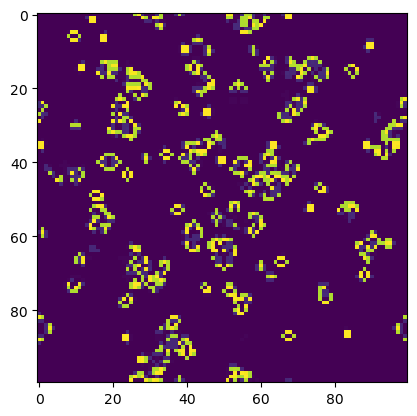

In [18]:
t=100
N = 100
 

def initialize_grid(N):
    """Initialize the grid."""
    return np.random.choice([0, 1], size=(N, N), p=[0.8, 0.2]).astype(float)
 

def update(frameNum, img, grid, N ,Lambda):
    """Update the grid for the next generation."""
    new_grid = grid.copy().astype(float)
    neighbors = compute_neighbours(grid)
     
    t1,t2,t3=1.5,2.5,3.5
    stability_region=(t1,t2)
    reproduction_region=(t2,t3)

    stable_cond = (neighbors > stability_region[0]) & (neighbors < stability_region[1])
    reproducing_cond = (neighbors > reproduction_region[0]) & (neighbors < reproduction_region[1])
    decay_cond = (neighbors < stability_region[0]) | (neighbors > reproduction_region[1])
    
    new_grid[decay_cond] = np.maximum(0, new_grid[decay_cond] - Lambda * new_grid[decay_cond])
    new_grid[reproducing_cond] = np.minimum(1,(new_grid[reproducing_cond]+Lambda * (np.ones_like(new_grid)[reproducing_cond] - new_grid[reproducing_cond])))

    if img is not None:
        img.set_data(new_grid)
    
    grid[:] = new_grid[:]
    return new_grid
 

grid = np.random.choice([0, 1], size=(N, N), p=[0.8, 0.2]).astype(float)

fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, 0.875),
                              frames=t,
                              interval=1000,
                              save_count=t)

from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=15)

# Save the animation
ani.save('game_of_life_lambda=0.875.gif', writer=writer)

### Creating subplots for different $\lambda$ values 

C:\Users\Admin\AppData\Local\Temp\ipykernel_19032\4022442193.py:20: UserWarning: You passed in an explicit save_count=500 which is being ignored in favor of frames=500.
  ani = animation.FuncAnimation(fig, update_all, frames=t, interval=1000, save_count=t, blit=False)


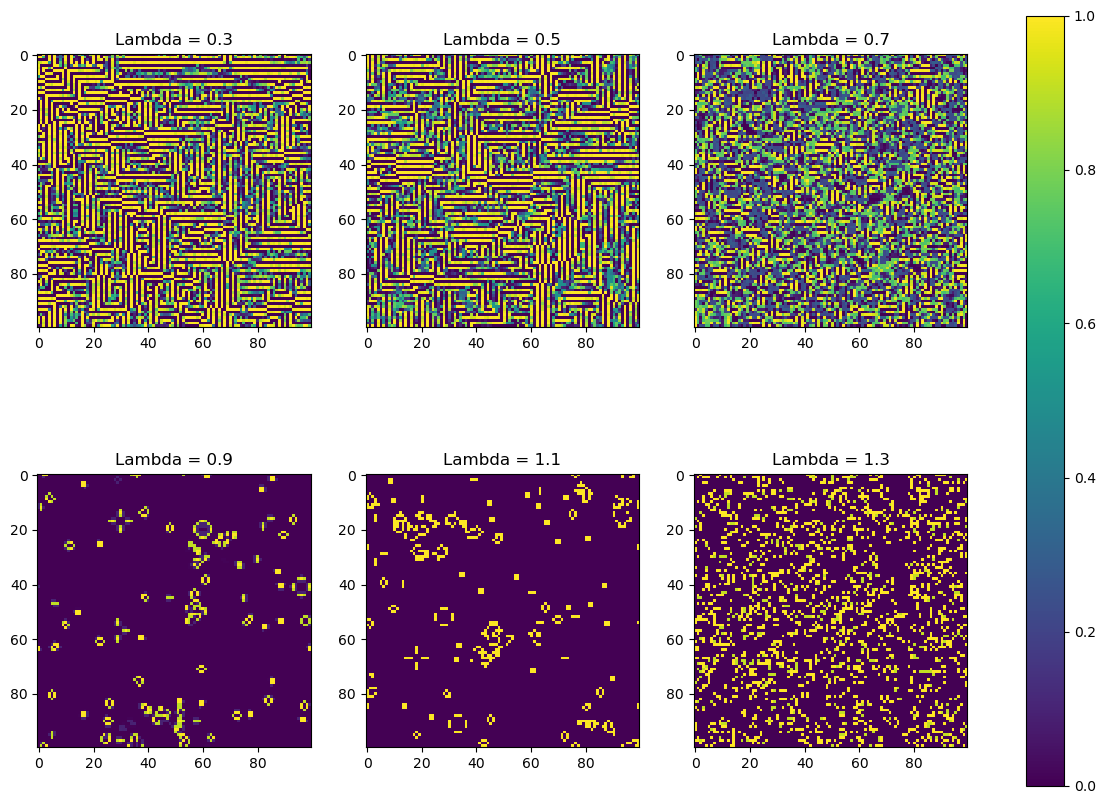

In [36]:
t = 500
N = 100
lambdas = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3]  # Example lambda values
output_dir = "Lambda_params"
os.makedirs(output_dir, exist_ok=True)

# Set up the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Initialize grids for each subplot
grids = [initialize_grid(N) for _ in range(len(axs))]
imgs = [ax.imshow(grid, interpolation='nearest') for ax, grid in zip(axs, grids)]

# Create a single animation that updates all subplots together
def update_all(frameNum):
    for i, Lambda in enumerate(lambdas):
        update(frameNum, imgs[i], grids[i], N, Lambda)
        axs[i].set_title(f'Lambda = {Lambda}') 
ani = animation.FuncAnimation(fig, update_all, frames=t, interval=1000, save_count=t, blit=False)

# Save the animation to the "Lambda_params" folder
output_file = os.path.join(output_dir, 'game_of_life_combined.gif')
writer = PillowWriter(fps=15)
ani.save(output_file, writer=writer)

plt.colorbar(imgs[0], ax=axs)  # Add a colorbar to one of the subplots (you can choose any)

plt.show()

### Density of States

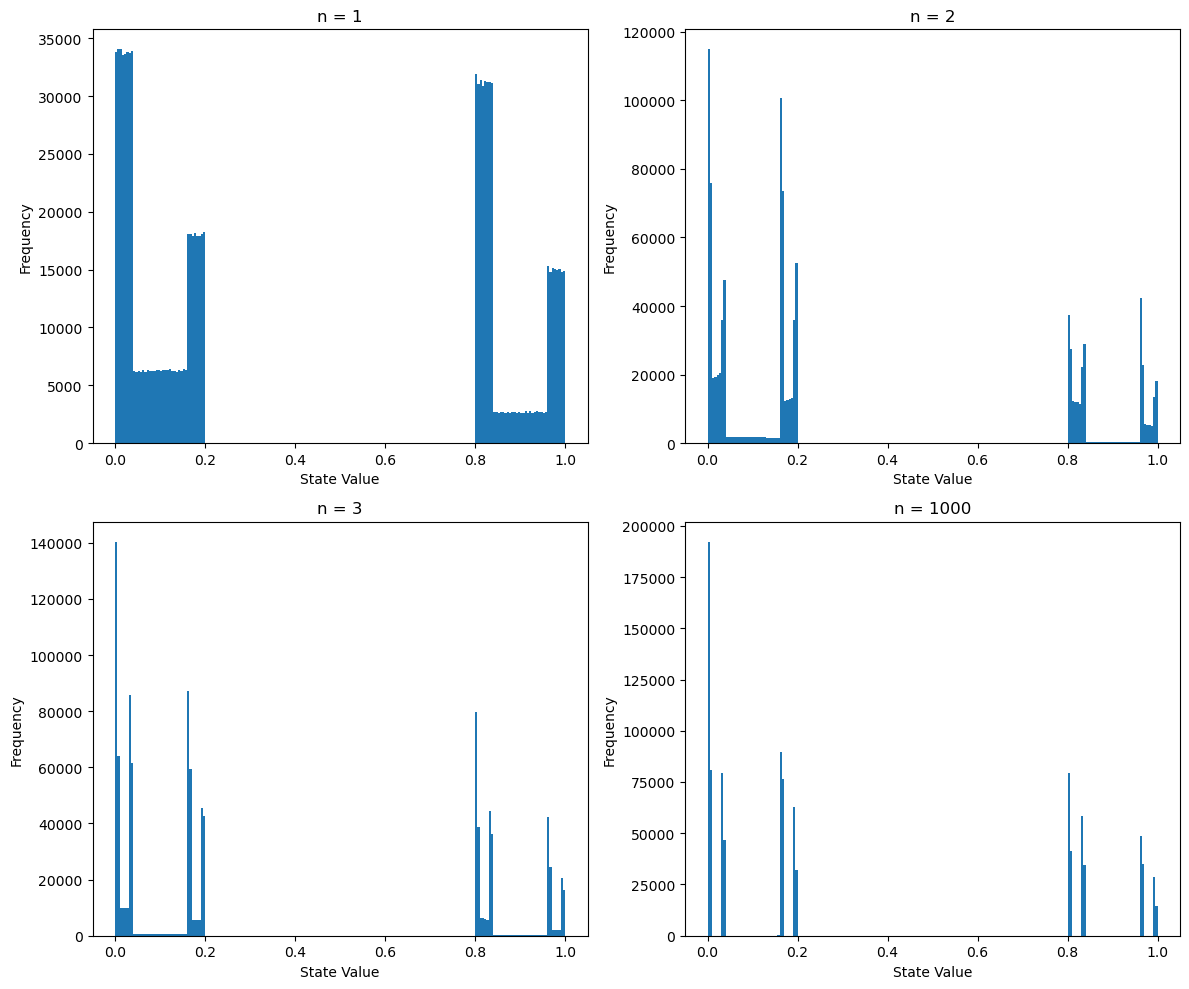

In [95]:
def density_of_states(ax, grid, N, Lambda, n):
    """Plot the density of states on a given axis."""
    for _ in range(n):
        grid = update(None, None, grid, N, Lambda)

    grid_flat = grid.flatten()
    ax.hist(grid_flat, bins=200, range=(0, 1))
    ax.set_title(f'n = {n}')
    ax.set_xlabel('State Value')
    ax.set_ylabel('Frequency')
    
def initialize_grid(N):
    """Initialize the grid."""
    random_values = np.random.rand(N, N)
    grid = np.where(random_values < 0.7, np.random.uniform(0, 0.2, size=(N, N)), np.random.uniform(0.8, 1, size=(N, N)))
    return grid

N = 1000
Lambda = 0.8

# Initialize the grid
grid = initialize_grid(N)

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Run the simulation for different iteration counts and plot
iteration_counts = [1, 2, 3, 1000]
for ax, n in zip(axs.flatten(), iteration_counts):
    density_of_states(ax, grid.copy(), N, Lambda, n)

plt.tight_layout()
plt.show()

### Phase Transition in Logistic Game of Life(GOL)

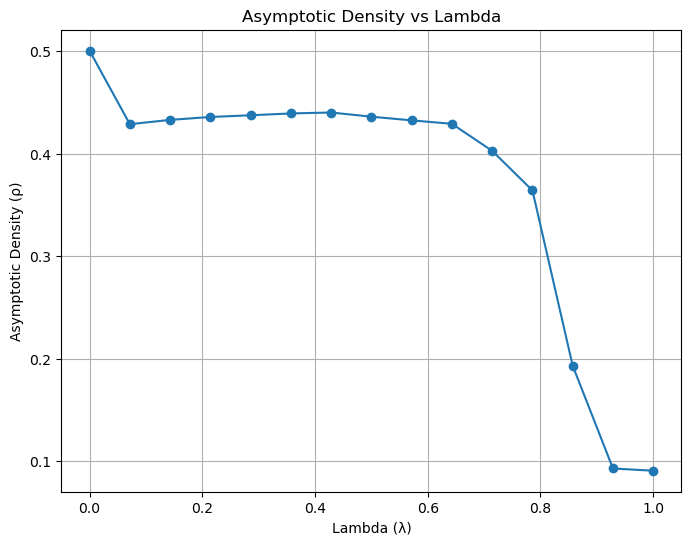

In [20]:
def initialize_grid(N):
    """Initialize the grid with a uniform distribution between 0 and 1."""
    grid = np.random.uniform(0, 1, size=(N, N))
    return grid


def calculate_asymptotic_density(N, Lambda, steps_for_settling, steps_for_averaging):
    grid = initialize_grid(N)
    # Run the simulation for settling
    for _ in range(steps_for_settling):
        grid = update(None, None, grid, N, Lambda)

    # Run the simulation for averaging
    total_density = 0
    for _ in range(steps_for_averaging):
        grid = update(None, None, grid, N, Lambda)
        total_density += np.mean(grid)

    return total_density / steps_for_averaging





lambda_values = np.linspace(0,1,15 )  # For example, from 0.1 to 1.0 in 10 steps

# Parameters for the simulation
N = 250 # Size of the grid
steps_for_settling = 100
steps_for_averaging = 5
num_trials = 5



# Calculate asymptotic densities for each Lambda
asymptotic_densities = []
for Lambda in lambda_values:
    densities = []
    for _ in range(num_trials):
        grid = initialize_grid(N)
        density = calculate_asymptotic_density(N, Lambda, steps_for_settling, steps_for_averaging)
        densities.append(density)
    asymptotic_densities.append(np.mean(densities))

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, asymptotic_densities, marker='o', linestyle='-')
plt.xlabel('Lambda (λ)')
plt.ylabel('Asymptotic Density (ρ)')
plt.title('Asymptotic Density vs Lambda')
plt.grid(True)

# Save the plot to a file
plt.savefig('asymptotic_density_vs_lambda.png')  # You can choose a different file format if you prefer

# Display the plot
plt.show()

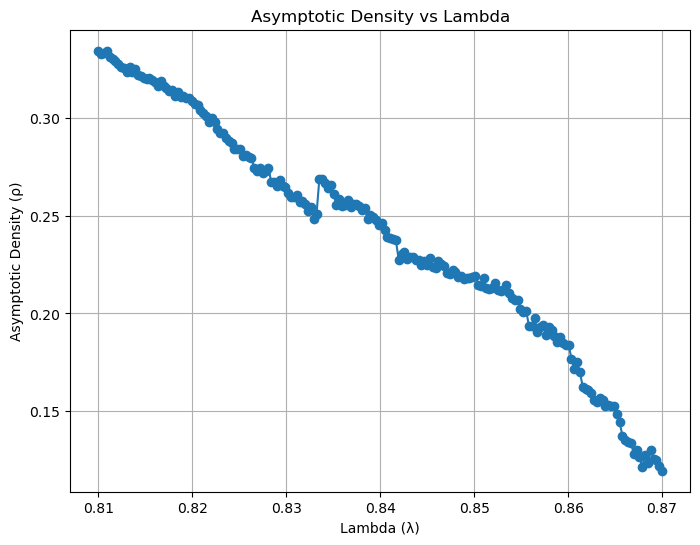

In [23]:
# Plotting the results
lambda_values = np.linspace(0.81,0.87,200 ) 
asymptotic_densities = []
for Lambda in lambda_values:
    densities = []
    for _ in range(num_trials):
        grid = initialize_grid(N)
        density = calculate_asymptotic_density(N, Lambda, steps_for_settling, steps_for_averaging)
        densities.append(density)
    asymptotic_densities.append(np.mean(densities))

plt.figure(figsize=(8, 6))
plt.plot(lambda_values, asymptotic_densities, marker='o', linestyle='-')
plt.xlabel('Lambda (λ)')
plt.ylabel('Asymptotic Density (ρ)')
plt.title('Asymptotic Density vs Lambda')
plt.grid(True)

# Save the plot to a file
plt.savefig('asymptotic_density_vs_lambda.png')  # You can choose a different file format if you prefer

# Display the plot
plt.show()

### Rayfish observation via localized initialization of grid

C:\Users\Admin\AppData\Local\Temp\ipykernel_11724\2476913888.py:21: UserWarning: You passed in an explicit save_count=500 which is being ignored in favor of frames=500.
  ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N,  0.838),


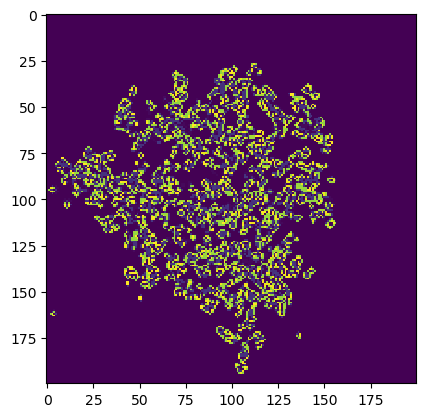

In [15]:
N=200
t=500
center_size = 30 
# Function to initialize the grid with a localized region of 0s in the center
def initialize_grid_with_uniform_center(N, center_size):
    grid = np.zeros((N, N))
    start = (N - center_size) // 2
    end = start + center_size
    grid[start:end, start:end] = np.random.uniform(0, 1, (center_size, center_size))
    return grid






grid = initialize_grid_with_uniform_center(N, center_size)

fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N,  0.838),
                              frames=t,
                              interval=1000,
                              save_count=t)

from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=15)

# Save the animation
ani.save('Rayfish.gif', writer=writer)